## SoftMax Regression

Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes. In logistic regression we assumed that the labels were binary: y(i)∈{0,1}. We used such a classifier to distinguish between two kinds of hand-written digits. Softmax regression allows us to handle y(i)∈{1,…,K} where K is the number of classes.

Recall that in logistic regression, we had a training set {(x(1),y(1)),…,(x(m),y(m))} of m labeled examples, where the input features are x(i)∈Rn. With logistic regression, we were in the binary classification setting, so the labels were y(i)∈{0,1}. Our hypothesis took the form:

$$
\begin{array}{c}{h_{\theta}(x)=\frac{1}{1+e^{-\theta T_{x}}}} \end{array}
$$

and the model parameters θ were trained to minimize the cost function

$$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{i} \log \left(h_{\theta}\left(x^{i}\right)\right)+\left(1-y^{i}\right) \log \left(1-h_{\theta}\left(x^{i}\right)\right)\right]
$$

In the softmax regression setting, we are interested in multi-class classification (as opposed to only binary classification), and so the label y can take on K different values, rather than only two. Thus, in our training set {(x(1),y(1)),…,(x(m),y(m))}, we now have that y(i)∈{1,2,…,K}. (Note that our convention will be to index the classes starting from 1, rather than from 0.) For example, in the MNIST digit recognition task, we would have K=10 different classes.

Given a test input x, we want our hypothesis to estimate the probability that P(y=k|x) for each value of k=1,…,K. I.e., we want to estimate the probability of the class label taking on each of the K different possible values. Thus, our hypothesis will output a K-dimensional vector (whose elements sum to 1) giving us our K estimated probabilities. Concretely, our hypothesis hθ(x) takes the form:


$$h_{\theta}(x)=\left[ \begin{array}{c}{P(y=1 | x ; \theta)} \\ {P(y=2 | x ; \theta)} \\ {\vdots} \\ {P(y=K | x ; \theta)}\end{array}\right]=\frac{1}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x\right)} \left[ \begin{array}{c}{\exp \left(\theta^{(1) \top} x\right)} \\ {\exp \left(\theta^{(2) \top} x\right)} \\ {\vdots} \\ {\exp \left(\theta^{(K) \top} x\right)}\end{array}\right]$$

Here $\theta^{(1)}, \theta^{(2)}, \ldots, \theta^{(K)} \in \mathfrak{R}^{n}$ are the parameters of our model. Notice that the term $\frac{1}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x\right)}$ normalizes the distribution, so that it sums to one.

# Cost Function

We now describe the cost function that we’ll use for softmax regression.

Our cost function will be
$$J(\theta)=-\left[\sum_{i=1}^{m} \sum_{k=1}^{K} 1\left\{y^{(i)}=k\right\} \log \frac{\exp \left(\theta^{(k) \top} x^{(i)}\right)}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x^{(i)}\right)}\right]$$

Notice that this generalizes the logistic regression cost function, which could also have been written:

$$\begin{aligned} J(\theta) &=-\left[\sum_{i=1}^{m}\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)+y^{(i)} \log h_{\theta}\left(x^{(i)}\right)\right] \\ &=-\left[\sum_{i=1}^{m} \sum_{k=0}^{1} 1\left\{y^{(i)}=k\right\} \log P\left(y^{(i)}=k | x^{(i)} ; \theta\right)\right] \end{aligned}$$

The softmax cost function is similar, except that we now sum over the K different possible values of the class label. Note also that in softmax regression, we have that

$$P\left(y^{(i)}=k | x^{(i)} ; \theta\right)=\frac{\exp \left(\theta^{(k) \top} x^{(i)}\right)}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x^{(i)}\right)}$$


We cannot solve for the minimum of J(θ) analytically, and thus as usual we’ll resort to an iterative optimization algorithm. Taking derivatives, one can show that the gradient is:

$$\nabla_{\theta^{(k)}} J(\theta)=-\sum_{i=1}^{m}\left[x^{(i)}\left(1\left\{y^{(i)}=k\right\}-P\left(y^{(i)}=k | x^{(i)} ; \theta\right)\right)\right]$$

Recall the meaning of the ”$\nabla_{\theta^{(k)}}$” notation. In particular, $\nabla_{\theta^{(k)}} J(\theta)$ is itself a vector, so that its j-th element is $\frac{\partial J(\theta)}{\partial \theta_{l k}}$ the partial derivative of $J(\theta)$ with respect to the j-th element of $\theta(k)$.

Armed with this formula for the derivative, one can then plug it into a standard optimization package and have it minimize $J(\theta)$.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('glass.csv')
N_labels = len(set(raw_data['Type']))
raw_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
#Check null entries
sns.heatmap(raw_data.isnull(),cbar=False)
# no entry is null

# Data visualization

In [ ]:
for feat in raw_data:
    sns.distplot(raw_data[feat])
    plt.show()

## These graphs clearly shows that our data in not Normally distributed it means due to some features our classification algorithm may be disturb

## Lets find the correlation between all features

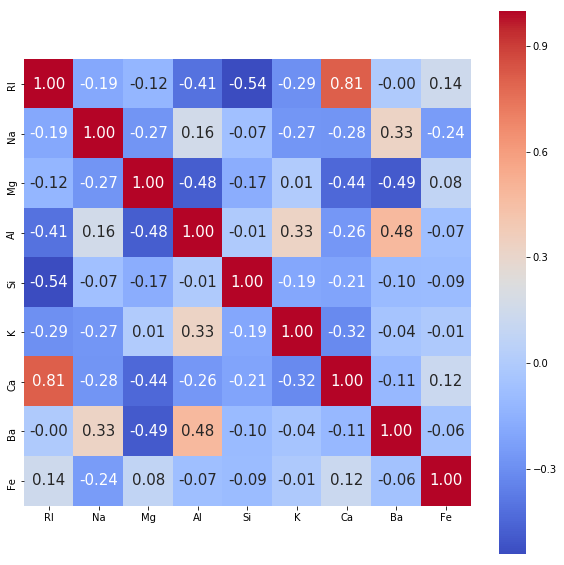

In [3]:
features = raw_data.columns[:-1].tolist()
corr = raw_data[features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, cmap= 'coolwarm')
plt.show()

## Ca and RI are positivity correlated i.e both are dependent Ba and Al also
## Therefore 
## 1. Logistic regression may not give us perfect results because according to there assumptions all independent variables are independent to each other.
## 2. Maximum liklihood not give us good results in small data sets

## But we try to compute classification on this data without any further changes

In [ ]:
sns.countplot(raw_data['Type'])
plt.show()

## We have 6 labels = [1,2,3,5,6,7] out of which 1 and 2 label contains more than 70 % of data

# Data Wrangling


In [ ]:
# data seperation
z = list(map(lambda i:raw_data[raw_data['Type']==i].iloc[:int(0.7*raw_data[raw_data['Type']==i].shape[0]),:],
             set(raw_data['Type'])))
training_data = pd.DataFrame()
training_data = training_data.append(z)
training_data_labels = np.array(training_data['Type'])
training_data.drop('Type',inplace=True,axis=1)
training_data = np.array(training_data)
training_data = (training_data)/np.max(training_data)  # normalized data

x = list(map(lambda i:raw_data[raw_data['Type']==i].iloc[:int(0.3*raw_data[raw_data['Type']==i].shape[0]),:],set(raw_data['Type'])))
testing_data = pd.DataFrame()
testing_data = testing_data.append(x)
testing_data_labels = np.array(testing_data['Type'])
testing_data.drop('Type',inplace=True,axis=1)
testing_data = np.array(testing_data)
testing_data = (testing_data)/np.max(testing_data)  # normalized data

pd.DataFrame(training_data)

In [ ]:
pd.DataFrame(testing_data)

## One Hot Encoding
A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [ ]:
def oneHotEncoding(label):
    s = pd.Series(label)
    return np.array(pd.get_dummies(s))
training_label_hot_encoded = oneHotEncoding(training_data_labels)
testing_label_hot_encoded = oneHotEncoding(testing_data_labels)
training_label_hot_encoded

In [ ]:
def softmax(theta0 , theta , data):
    exp = np.exp(theta0 + np.dot(data , theta))
    sum_denominator = np.sum((exp),axis=1)
    s = list(map(lambda i : exp[:,i] / sum_denominator , np.arange(N_labels)))
    return np.array(s).T

alpha = 0.001
epsilon = 0.00001
initial_theta0 = np.random.randn(1,N_labels) 
initial_theta = np.random.randn(training_data.shape[1] , N_labels)
i = 0
fc = []
itera = []
while(True):
    i+=1
 
    del_theta0 = (np.sum((softmax(initial_theta0 , initial_theta , training_data) - training_label_hot_encoded),axis = 0))/training_data.shape[0]
    del_theta = (np.matmul(training_data.T,(softmax(initial_theta0,initial_theta,training_data)-training_label_hot_encoded)))/training_data.shape[0]

    final_theta0 = initial_theta0 - alpha * del_theta0
    final_theta = initial_theta - alpha * del_theta

    initial_cost = (-np.sum(
        np.matmul(np.log(softmax(initial_theta0 , initial_theta , training_data)).T , training_label_hot_encoded )
        ))/training_data.shape[0]

    final_cost = (-np.sum(
        np.matmul(np.log(softmax(final_theta0 , final_theta , training_data)).T , training_label_hot_encoded )
        ))/training_data.shape[0]
    
    if (abs(final_cost - initial_cost)) < epsilon:
        break
    print('at {} iteration ANL : {}'.format(i,initial_cost))
    initial_theta0 = final_theta0
    initial_theta  = final_theta
    itera.append(i)
    fc.append(final_cost)

In [ ]:
plt.scatter(itera , fc)

## The curve going to decrease as we increase iterations i.e it's a sign of that gradient decent works 